In [40]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [41]:
# load clean merged Hospital csv
Hospital_merged_pd = pd.read_csv("./Cleaned_Data/Hospital_Merged_CleanNoIndex.csv")

In [42]:
Hospital_merged_pd.head(5)

,Provider ID,Cleanliness,Nurse_com,Doc_com,Staff_responsiveness,Pain_management,Comm_medicine,Discharge_info,Care_transition,Overall_Hos_Rating,...,Summary_star,Hospital Name,Address,City,State,County Name,ZIP Code,Phone Number,Hospital Type,Hospital Ownership
0,50002,2,2,2,2,2,2,2,1,2,...,2,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,ALAMEDA,94545,5107826200,Acute Care Hospitals,Voluntary non-profit - Church
1,50006,2,2,2,2,3,2,3,2,2,...,2,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,HUMBOLDT,95501,7074458121,Acute Care Hospitals,Voluntary non-profit - Private
2,50007,3,4,3,3,4,3,3,4,5,...,4,MILLS-PENINSULA MEDICAL CENTER,1501 TROUSDALE DRIVE,BURLINGAME,CA,SAN MATEO,94010,6506965270,Acute Care Hospitals,Voluntary non-profit - Private
3,50008,2,2,3,2,3,2,2,2,3,...,2,CALIFORNIA PACIFIC MEDICAL CTR-DAVIES CAMPUS HOSP,601 DUBOCE AVE,SAN FRANCISCO,CA,SAN FRANCISCO,94117,4156006000,Acute Care Hospitals,Voluntary non-profit - Other
4,50009,2,3,3,3,3,3,3,2,3,...,3,QUEEN OF THE VALLEY MEDICAL CENTER,1000 TRANCAS ST,NAPA,CA,NAPA,94558,7072524411,Acute Care Hospitals,Voluntary non-profit - Church


In [43]:
Hospital_merged_pd = Hospital_merged_pd[Hospital_merged_pd.Overall_Hos_Rating != "Not Available"]

In [44]:
Hospital_merged_pd.columns

Index(['Provider ID', 'Cleanliness', 'Nurse_com', 'Doc_com',
       'Staff_responsiveness', 'Pain_management', 'Comm_medicine',
       'Discharge_info', 'Care_transition', 'Overall_Hos_Rating', 'Quietness',
       'Recomm_hos', 'Summary_star', 'Hospital Name', 'Address', 'City',
       'State', 'County Name', 'ZIP Code', 'Phone Number', 'Hospital Type',
       'Hospital Ownership'],
      dtype='object')

In [59]:
# Change the data type for all the rating columns to float
Hospital_merged_pd["Overall_Hos_Rating"] = Hospital_merged_pd["Overall_Hos_Rating"].astype("float")
Hospital_merged_pd["Cleanliness"] = Hospital_merged_pd["Cleanliness"].astype("float")
Hospital_merged_pd["Nurse_com"] = Hospital_merged_pd["Nurse_com"].astype("float")
Hospital_merged_pd["Doc_com"] = Hospital_merged_pd["Doc_com"].astype("float")
Hospital_merged_pd["Staff_responsiveness"] = Hospital_merged_pd["Staff_responsiveness"].astype("float")
Hospital_merged_pd["Pain_management"] = Hospital_merged_pd["Pain_management"].astype("float")
Hospital_merged_pd["Comm_medicine"] = Hospital_merged_pd["Comm_medicine"].astype("float")
Hospital_merged_pd["Discharge_info"] = Hospital_merged_pd["Discharge_info"].astype("float")
Hospital_merged_pd["Care_transition"] = Hospital_merged_pd["Care_transition"].astype("float")
Hospital_merged_pd["Summary_star"] = Hospital_merged_pd["Summary_star"].astype("float")
Hospital_merged_pd["Recomm_hos"] = Hospital_merged_pd["Recomm_hos"].astype("float")
Hospital_merged_pd["Discharge_info"] = Hospital_merged_pd["Discharge_info"].astype("float")

In [46]:
# read county income data
county_income = pd.read_csv("./Cleaned_Data/county_income_df.csv")
county_income.columns


Index(['Unnamed: 0', 'County', '# Premature Deaths', '# Child Deaths',
       '# Infant Deaths', '# Limited Access', '% Limited Access',
       '# Uninsured Adults', '# Uninsured Children', '% Uninsured Adults',
       '% Uninsured Children', 'Household Income',
       '# Not Proficient in English', '% Not Proficient in English',
       'Population'],
      dtype='object')

In [47]:
# rename column name "County Name" to "County"
Hospital_merged_pd['County'] = Hospital_merged_pd['County Name']

In [48]:
# convert the County column in county_income column to upper case
# because County in Hospital Merged data is in Upper case.
county_income['County'] = county_income['County'].str.upper()

In [49]:
# merge Hospital data and county income data on County
Final_merge_pd = pd.merge(Hospital_merged_pd,county_income,on='County',how='left')
Final_merge_pd.to_csv("Final_Merged_Data_Set.csv", index = False)

Final_merge_pd.columns

Index(['Provider ID', 'Cleanliness', 'Nurse_com', 'Doc_com',
       'Staff_responsiveness', 'Pain_management', 'Comm_medicine',
       'Discharge_info', 'Care_transition', 'Overall_Hos_Rating', 'Quietness',
       'Recomm_hos', 'Summary_star', 'Hospital Name', 'Address', 'City',
       'State', 'County Name', 'ZIP Code', 'Phone Number', 'Hospital Type',
       'Hospital Ownership', 'County', 'Unnamed: 0', '# Premature Deaths',
       '# Child Deaths', '# Infant Deaths', '# Limited Access',
       '% Limited Access', '# Uninsured Adults', '# Uninsured Children',
       '% Uninsured Adults', '% Uninsured Children', 'Household Income',
       '# Not Proficient in English', '% Not Proficient in English',
       'Population'],
      dtype='object')

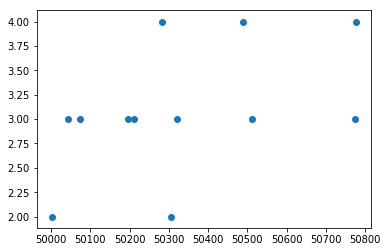

In [50]:
county_pd = Final_merge_pd[Final_merge_pd['County']== 'ALAMEDA']

plt.scatter(county_pd['Provider ID'], county_pd['Overall_Hos_Rating'])
plt.show()

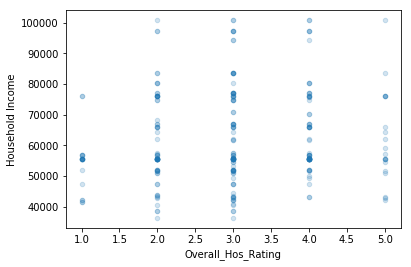

In [51]:
# Scatter Plot of Household Income vs Overall Hospital Rating
Final_merge_pd.plot.scatter('Overall_Hos_Rating','Household Income',alpha=.2)
plt.savefig("Ratings_Income_ScatterPlot.png")
plt.show()

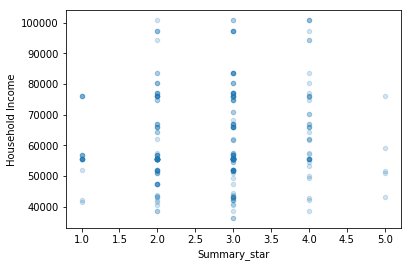

In [57]:
# Scatter Plot of Household Income vs Overall Hospital Rating
Final_merge_pd.plot.scatter('Summary_star','Household Income',alpha=.2)
#plt.savefig("SummaryRatings_Income_ScatterPlot.png")
plt.show()

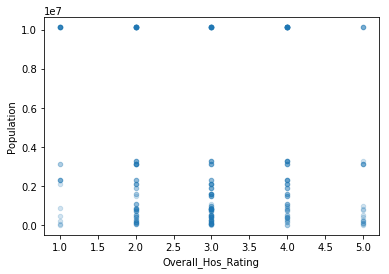

In [52]:
# Scatter Plot of Population vs Overall Hospital Rating
Final_merge_pd.plot.scatter('Overall_Hos_Rating', 'Population',alpha=.2)
plt.savefig("Rating_Population_ScatterPlot.png")
plt.show()

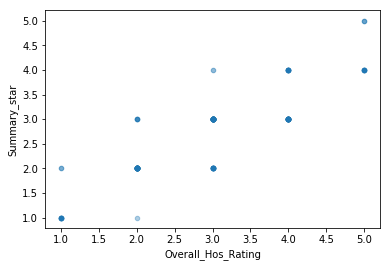

In [53]:
# Scatter Plot of Percent English Speakers vs Overall Hospital Rating
Final_merge_pd.plot.scatter('Overall_Hos_Rating','Summary_star',alpha=.2)
#plt.savefig("Ratings_ScatterPlot.png")
plt.show()

In [54]:
Final_merge_pd['Summary_star'].sum()

798.0

In [55]:
# group by County
County_ratings = Hospital_merged_pd.groupby("County Name")
meanRatings_County = pd.DataFrame(round(County_ratings["Overall_Hos_Rating"].mean(), 2))
meanRatings_County.to_csv("Mean_Overall_Ratings_perCounty.csv")


In [56]:
mean_ratings_county = pd.read_csv("Mean_Overall_Ratings_perCounty.csv")